In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
pd.options.display.max_columns=None

In [3]:
df = pd.read_csv("../archivos_editados/df_completo.csv",index_col=0)
df.shape

(25973, 22)

In [4]:
df.duplicated().sum()

10

In [5]:
df.drop_duplicates(inplace= True)

In [6]:
dic_columnas={'Q3':"pais", 
              'Q4':"nivel_estudios", 
              'Q5':"tipo_trabajo",
              'Q6':"tiempo_cod", 
              'Q8':"len_recom",
              'Q15':"tiempo_use_ML",
              'Q20':"sector_empresa", 
              'Q21':"tamaño_empresa", 
              'Q23':"uso_ML", 
              'Q25':"salario", 
              'Q33':"BBDD",
              'Q35':"herramientas_BI2", 
              'Q41':"herramienta_principal", 
              'Q7':"lenguaje_cod", 
              'Q9':"entorno_ID", 
              'Q14':"librerias", 
              'Q16':"librerias_ML", 
              'Q17':"algoritmos_ML", 
              'Q24':"actividades_trabajo", 
              'Q34':"herramientas_BI",
              'age':"edad", 
              'gender':"genero"}

In [7]:
df.rename(columns=dic_columnas, inplace=True)


In [8]:
df = df.reset_index(drop = True)


In [9]:
nuevo_orden=['edad','genero', 'pais', 'nivel_estudios', 'tipo_trabajo', 'tiempo_cod', 'len_recom',
       'tiempo_use_ML', 'sector_empresa', 'tamaño_empresa', 'uso_ML',
       'salario', 'BBDD', 'herramientas_BI', 'herramienta_principal',
       'lenguaje_cod', 'entorno_ID', 'librerias', 'librerias_ML',
       'algoritmos_ML', 'actividades_trabajo', 'herramientas_BI2']

In [10]:
df = df.reindex(columns = nuevo_orden)


CREAMOS UN FATAFRAME NUEVO QUEDÁNDONOS SOLO CON LOS DATA Y BUSINESS ANALYST

In [11]:
df_data = df[(df["tipo_trabajo"] == "Business Analyst") | (df ["tipo_trabajo"] == "Data Analyst")]
df_data.head(5)

,edad,genero,pais,nivel_estudios,tipo_trabajo,tiempo_cod,len_recom,tiempo_use_ML,sector_empresa,tamaño_empresa,uso_ML,salario,BBDD,herramientas_BI,herramienta_principal,lenguaje_cod,entorno_ID,librerias,librerias_ML,algoritmos_ML,actividades_trabajo,herramientas_BI2
16,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,Python,1-2 years,Energy/Mining,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"2,000-2,999",NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Scikit-learn,Linear or Logistic Regression,Analyze and understand data to influence produ...,NaN
32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,R,I do not use machine learning methods,Manufacturing/Fabrication,250-999 employees,NaN,NaN,NaN,NaN,NaN,R,RStudio,Ggplot / ggplot2,NaN,NaN,NaN,NaN
33,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,R,I do not use machine learning methods,Non-profit/Service,0-49 employees,No (we do not use ML methods),"7,500-9,999",NaN,None,"Basic statistical software (Microsoft Excel, G...",Python,"Notepad++,Jupyter Notebook",None,NaN,NaN,Analyze and understand data to influence produ...,NaN
46,22-24,Man,China,Some college/university study without earning ...,Data Analyst,< 1 years,Python,1-2 years,Computers/Technology,0-49 employees,No (we do not use ML methods),$0-999,NaN,NaN,"Basic statistical software (Microsoft Excel, G...","Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Plotly / Plotly Express","Scikit-learn , TensorFlow ,Keras ,PyTorch","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN
52,40-44,Man,South Africa,Master’s degree,Data Analyst,1-3 years,R,1-2 years,Manufacturing/Fabrication,250-999 employees,No (we do not use ML methods),"25,000-29,999",NaN,Microsoft Power BI,"Local development environments (RStudio, Jupyt...","R, SQL","RStudio ,Jupyter Notebook","Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny","Caret ,Tidymodels","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN


VAMOS A FILTRAR POR LA COLUMNA "lenguaje_cod" PARA VER LOS LENGUAJES MÁS UTILIZADOS

QUE LENGUAJES SE UTILIZAN MÁS

In [12]:
lista_lenguajes = ["Python", "R", "SQL", "C[^\+]", "C\+\+" ,"Java", "Javascript", "Julia", "Swift", "Bash", "MATLAB", "Other", "None" ]


In [13]:
lista_lenguajes

['Python',
 'R',
 'SQL',
 'C[^\\+]',
 'C\\+\\+',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'Other',
 'None']

In [14]:
#CREAMOS UNA FUNCION PARA ITERAR POR TODA LA COLUMNA

def lenguajes (columna,lista):
    valores = []
    for elemento in lista:
        valor = columna.str.contains(elemento, case = True, regex = True).sum() 
        valores.append(valor)
    return valores

In [15]:
lista_valores = lenguajes(df_data["lenguaje_cod"], lista_lenguajes)

In [16]:
lista_valores

[2465, 928, 1866, 192, 288, 505, 327, 21, 20, 131, 230, 300, 59]

In [17]:
lista_data = lista_lenguajes , lista_valores

In [18]:
lista_data

(['Python',
  'R',
  'SQL',
  'C[^\\+]',
  'C\\+\\+',
  'Java',
  'Javascript',
  'Julia',
  'Swift',
  'Bash',
  'MATLAB',
  'Other',
  'None'],
 [2465, 928, 1866, 192, 288, 505, 327, 21, 20, 131, 230, 300, 59])

In [19]:
df_lenguajes = pd.DataFrame(lista_data).T

In [20]:
nombre_columnas = {0: "lenguajes", 1: "Cantidad_de_usuarios"} ## cambiamos el nombre a las columnas

In [21]:
df_lenguajes.rename(columns = nombre_columnas, inplace = True)

In [22]:
df_lenguajes = df_lenguajes.sort_values(by = "Cantidad_de_usuarios", ascending = False)
df_lenguajes

,lenguajes,Cantidad_de_usuarios
0,Python,2465
2,SQL,1866
1,R,928
5,Java,505
6,Javascript,327
11,Other,300
4,C\+\+,288
10,MATLAB,230
3,C[^\+],192
9,Bash,131


    Los lenguajes más utilizados claramente son Python y SQL, que son los mismos que utiliza Adalab. Creamos una gráfica para su mejor visualización.

<AxesSubplot:xlabel='Cantidad_de_usuarios', ylabel='lenguajes'>

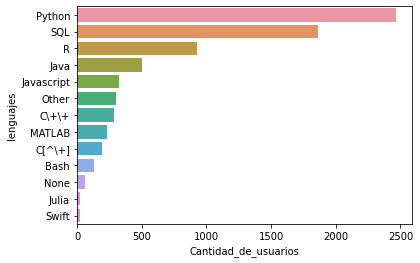

In [23]:
sns.barplot(data = df_lenguajes, x='Cantidad_de_usuarios', y = "lenguajes"  )

VAMOS A FILTRAR POR LA COLUMNA Q8 PARA VER LOS LENGUAJES MÁS RECOMENDADOS

QUE LENGUAJES RECOMIENDAN

In [24]:
lista_lenguajes

['Python',
 'R',
 'SQL',
 'C[^\\+]',
 'C\\+\\+',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'Other',
 'None']

In [25]:
df_data["len_recom"].unique()

array(['Python', 'R', 'C', 'SQL', nan, 'Java', 'C++', 'MATLAB', 'Other',
       'Julia', 'Javascript', 'Bash', 'None', 'Swift'], dtype=object)

In [26]:
df_lenguaje_recomendado = df_data["len_recom"].value_counts().reset_index()
df_lenguaje_recomendado

,index,len_recom
0,Python,2195
1,SQL,349
2,R,263
3,C++,39
4,Java,30
5,C,25
6,Other,24
7,MATLAB,20
8,Julia,14
9,None,14


<AxesSubplot:xlabel='index', ylabel='len_recom'>

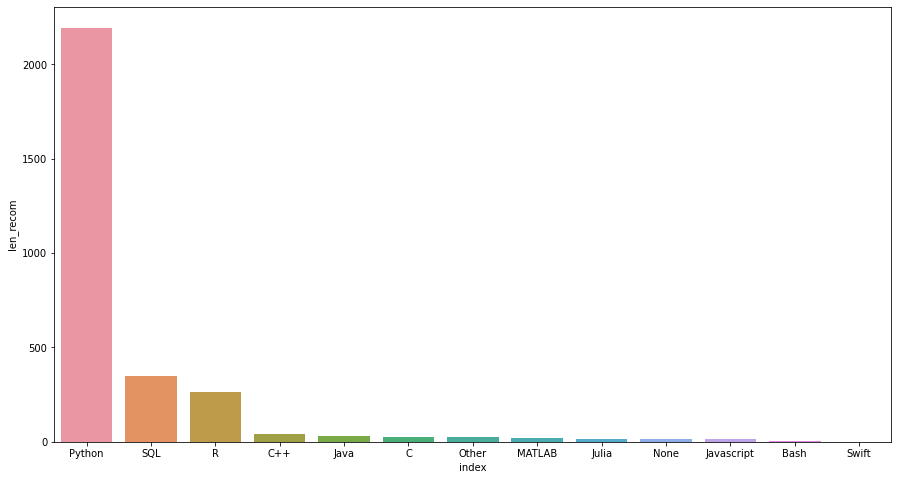

In [27]:
plt.figure(figsize = (15,8))
sns.barplot(x= "index",y = "len_recom", data = df_lenguaje_recomendado)

La mayoría de analistas recomiendan empezar estudiando python y, en menor medida, SQL y R.

In [28]:
df_data["tiempo_cod"].unique()

array(['20+ years', '< 1 years', '3-5 years', '1-3 years', '5-10 years',
       'I have never written code', '10-20 years'], dtype=object)

<AxesSubplot:xlabel='tiempo_cod', ylabel='count'>

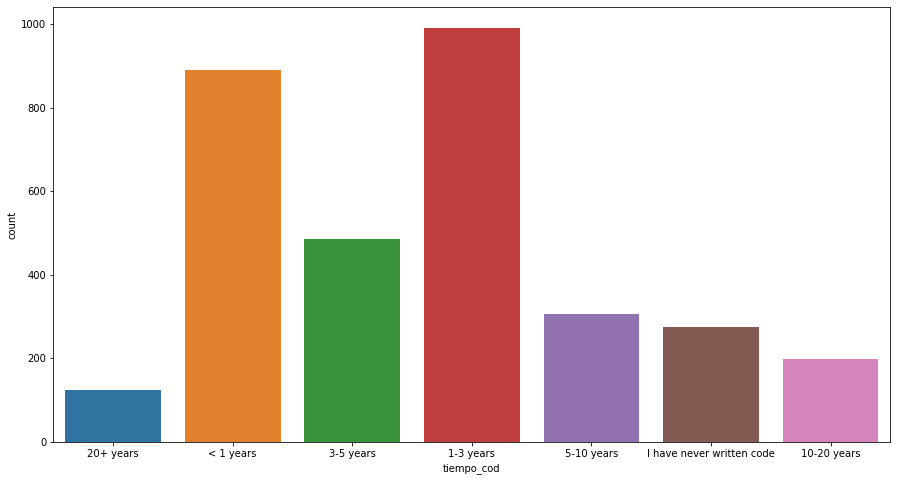

In [29]:
plt.figure(figsize = (15,8))
sns.countplot(x= df_data["tiempo_cod"], data = df_data)

Vemos que la mayoría de analistas tienen menos de 5 años de experiencia.

In [30]:
lista_entornos = ["JupyterLab", "RStudio", "Visual Studio", "Visual Studio Code \(VSCode\)", "PyCharm", "Spyder", "Notepad\+\+", "Sublime Text",
                  "Vim", "Emacs", "MATLAB", "Jupyter Notebook", "None","Other"]

In [31]:
def entornos(columna,lista):
    valores = []
    for elemento in lista:
        valor = columna.str.contains(elemento, regex = True).sum() 
        valores.append(valor)
    return valores

In [32]:
valores_entornos = entornos(df_data["entorno_ID"], lista_entornos)

In [33]:
lista_entornos_usados = lista_entornos , valores_entornos

In [34]:
df_entornos = pd.DataFrame(lista_entornos_usados).T
df_entornos

,0,1
0,JupyterLab,634
1,RStudio,820
2,Visual Studio,1144
3,Visual Studio Code \(VSCode\),865
4,PyCharm,728
5,Spyder,476
6,Notepad\+\+,539
7,Sublime Text,259
8,Vim,86
9,Emacs,86


In [35]:
nombre_columnas = {0: "Entornos", 1: "Cantidad_de_usuarios"}

In [36]:
df_entornos.rename(columns = nombre_columnas, inplace = True)

In [37]:
df_data["len_recom"].value_counts().reset_index()

,index,len_recom
0,Python,2195
1,SQL,349
2,R,263
3,C++,39
4,Java,30
5,C,25
6,Other,24
7,MATLAB,20
8,Julia,14
9,None,14


In [38]:
df_entornos = df_entornos.sort_values(by = "Cantidad_de_usuarios", ascending = False)
df_entornos

,Entornos,Cantidad_de_usuarios
11,Jupyter Notebook,2149
2,Visual Studio,1144
3,Visual Studio Code \(VSCode\),865
1,RStudio,820
4,PyCharm,728
0,JupyterLab,634
6,Notepad\+\+,539
5,Spyder,476
7,Sublime Text,259
10,MATLAB,166


<AxesSubplot:xlabel='Cantidad_de_usuarios', ylabel='lenguajes'>

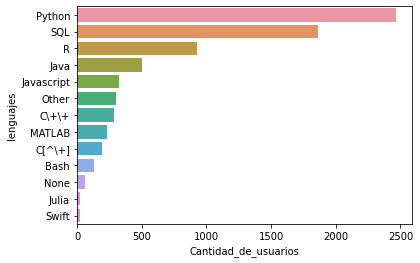

In [40]:
sns.barplot(data = df_lenguajes, x='Cantidad_de_usuarios', y = "lenguajes"  )

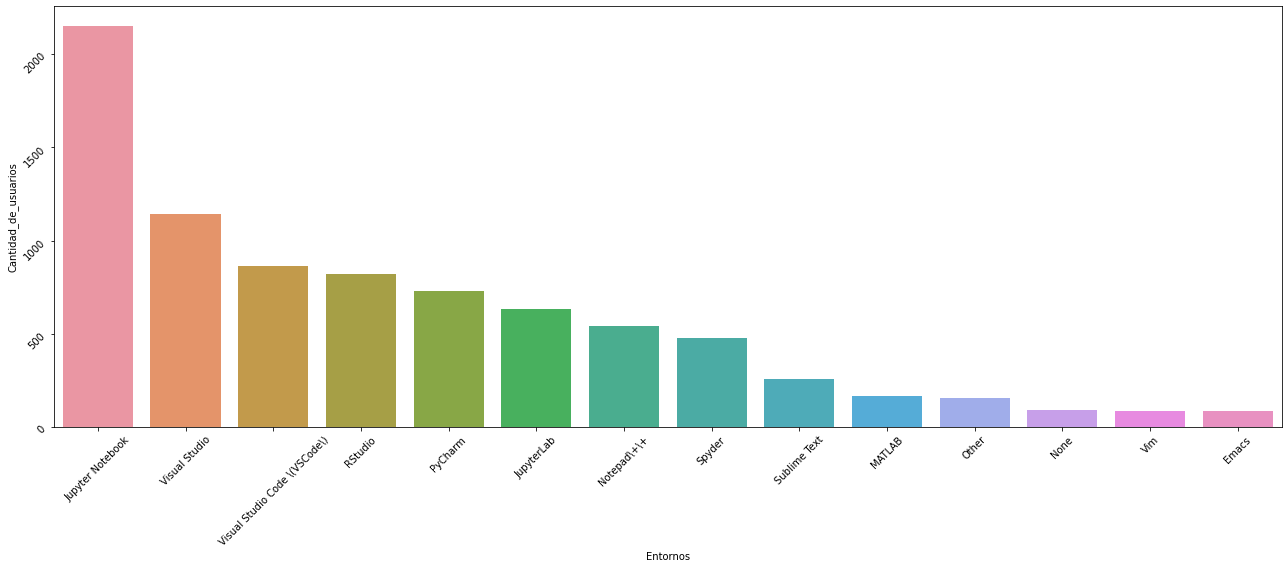

In [42]:
plt.figure(figsize = (18,8))
sns.barplot(x= "Entornos", y = "Cantidad_de_usuarios", data = df_entornos)
plt.tick_params(rotation = 45)
plt.tight_layout()

In [43]:
df.head()

,edad,genero,pais,nivel_estudios,tipo_trabajo,tiempo_cod,len_recom,tiempo_use_ML,sector_empresa,tamaño_empresa,uso_ML,salario,BBDD,herramientas_BI,herramienta_principal,lenguaje_cod,entorno_ID,librerias,librerias_ML,algoritmos_ML,actividades_trabajo,herramientas_BI2
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,No (we do not use ML methods),"25,000-29,999",NaN,None,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"60,000-69,999",NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",I do not know,$0-999,MySQL,None,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,NaN,None of these activities are an important par...,NaN
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,5-10 years,Academics/Education,"1000-9,999 employees",I do not know,"30,000-39,999",NaN,NaN,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,NaN
4,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,10-20 years,Academics/Education,50-249 employees,We use ML methods for generating insights (but...,"30,000-39,999",NaN,Microsoft Power BI,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook","Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN


In [44]:
def sel_valores (columna,lista):
    valores = []
    for elemento in lista:
        valor = columna.str.contains(elemento, case = True, regex = True).sum() 
        valores.append(valor)
    return valores

In [45]:
lista_librerias = ['Matplotlib', 'Seaborn', 'Plotly / Plotly Express', 'Ggplot / ggplot2', 'Shiny', 'D3 js', 'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'None', 'Other']

In [46]:
librerias = sel_valores(df_data["librerias"], lista_librerias)
librerias

[1984, 1559, 796, 830, 235, 105, 50, 138, 198, 94, 420, 127]

In [47]:
lista_total = lista_librerias, librerias
lista_total

(['Matplotlib',
  'Seaborn',
  'Plotly / Plotly Express',
  'Ggplot / ggplot2',
  'Shiny',
  'D3 js',
  'Altair',
  'Bokeh',
  'Geoplotlib',
  'Leaflet / Folium',
  'None',
  'Other'],
 [1984, 1559, 796, 830, 235, 105, 50, 138, 198, 94, 420, 127])

In [48]:
df_librerias = pd.DataFrame(lista_total).T
nombre_columnas = {0: "Librerias", 1: "Cantidad_de_usuarios"}
df_librerias.rename(columns = nombre_columnas, inplace = True)
df_librerias


,Librerias,Cantidad_de_usuarios
0,Matplotlib,1984
1,Seaborn,1559
2,Plotly / Plotly Express,796
3,Ggplot / ggplot2,830
4,Shiny,235
5,D3 js,105
6,Altair,50
7,Bokeh,138
8,Geoplotlib,198
9,Leaflet / Folium,94


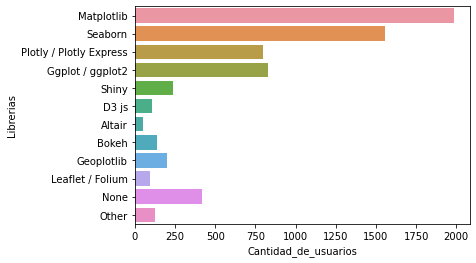

In [49]:
sns.barplot(data = df_librerias, x= 'Cantidad_de_usuarios', y = 'Librerias');

In [50]:
df_data.to_csv("../archivos_editados/df_data.csv")